In [1]:
#CONVOLUTIONAL NEURAL NETWORK (CNN)
import numpy as np
import pandas as pd


In [2]:
!pip install --upgrade pip

In [3]:
!pip install keras  



In [4]:
!pip install tensorflow

In [5]:
!pip install -U tensorflow

In [6]:
!python -m pip show tensorflow

Name: tensorflow
Version: 2.12.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: c:\users\auror\anaconda3\lib\site-packages
Requires: tensorflow-intel
Required-by: 


In [7]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [8]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout

In [9]:
image_val=[1427,1430,1431,1436,1437,1438,1440,1442]
import numpy as np
import matplotlib.pyplot as plt 
from keras.utils import load_img, img_to_array
import numpy as np

In [10]:
#debido a la cantidad de imágenes no tan alta, para evitar overfitting se hara:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
        rescale=1./255, 
        shear_range=0.2, 
        zoom_range=0.2, 
        rotation_range=20,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

training_dataset = train_datagen.flow_from_directory("/caso_practico_deep_learning/Data/train/",
                                                    target_size=(64, 64),
                                                    batch_size=32,
                                                    class_mode='binary')

testing_dataset = test_datagen.flow_from_directory("/caso_practico_deep_learning/Data/test/",
                                                target_size=(64, 64),
                                                batch_size=32,
                                                class_mode='binary')


Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [11]:
classifier = keras.models.Sequential()

In [12]:
#creando la primera capa
classifier.add(Conv2D(filters = 32, 
                      kernel_size = (3, 3),
                      input_shape = (64, 64, 3), 
                      activation = "relu")
                      )

In [13]:
#max pooling
classifier.add(MaxPooling2D(pool_size = (2,2)))

In [14]:
#segunda capa convolucional
classifier.add(Conv2D(filters = 64,kernel_size = (3, 3), activation = "relu"))

In [15]:
#max pooling
classifier.add(MaxPooling2D(pool_size = (2,2)))

In [16]:
#aplanando la matriz
classifier.add(Flatten())
classifier.add(Dropout(0.6))

In [17]:
classifier.add(Dense(units = 128, activation = "relu"))
classifier.add(Dense(units = 1, activation = "sigmoid"))#sigmoid al ser dos categorias

In [18]:
#calculando los parámetros
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 12544)             0         
                                                                 
 dropout (Dropout)           (None, 12544)             0

In [19]:
#compilar
classifier.compile(optimizer = "RMSprop", 
                   loss = "binary_crossentropy", 
                   metrics = ["accuracy"])

In [20]:
print("train_data: ",training_dataset.n)
print("test_data: ",testing_dataset.n)

train_data:  5216
test_data:  624


In [21]:
history = classifier.fit(training_dataset,
                        steps_per_epoch = training_dataset.n//32,
                        epochs=75,
                        validation_data=testing_dataset,
                        validation_steps=testing_dataset.n//32 
                        )

Epoch 1/75
163/163 [==============================] - 115s 700ms/step - loss: 0.5457 - accuracy: 0.7619 - val_loss: 0.4280 - val_accuracy: 0.7747
Epoch 2/75
163/163 [==============================] - 110s 673ms/step - loss: 0.3379 - accuracy: 0.8522 - val_loss: 0.3170 - val_accuracy: 0.8684
Epoch 3/75
163/163 [==============================] - 105s 643ms/step - loss: 0.2744 - accuracy: 0.8834 - val_loss: 0.4677 - val_accuracy: 0.8010
Epoch 4/75
163/163 [==============================] - 106s 650ms/step - loss: 0.2567 - accuracy: 0.8951 - val_loss: 0.4419 - val_accuracy: 0.7862
Epoch 5/75
163/163 [==============================] - 118s 727ms/step - loss: 0.2228 - accuracy: 0.9089 - val_loss: 0.5157 - val_accuracy: 0.7944
Epoch 6/75
163/163 [==============================] - 126s 771ms/step - loss: 0.2039 - accuracy: 0.9197 - val_loss: 0.2935 - val_accuracy: 0.8882
Epoch 7/75
163/163 [==============================] - 118s 725ms/step - loss: 0.2134 - accuracy: 0.9170 - val_loss: 0.3466 -

163/163 [==============================] - 87s 532ms/step - loss: 0.1192 - accuracy: 0.9565 - val_loss: 0.2600 - val_accuracy: 0.9211
Epoch 58/75
163/163 [==============================] - 86s 529ms/step - loss: 0.1080 - accuracy: 0.9615 - val_loss: 0.2666 - val_accuracy: 0.9128
Epoch 59/75
163/163 [==============================] - 87s 532ms/step - loss: 0.1198 - accuracy: 0.9561 - val_loss: 0.3122 - val_accuracy: 0.9194
Epoch 60/75
163/163 [==============================] - 93s 573ms/step - loss: 0.1215 - accuracy: 0.9563 - val_loss: 0.2045 - val_accuracy: 0.9260
Epoch 61/75
163/163 [==============================] - 92s 564ms/step - loss: 0.1196 - accuracy: 0.9594 - val_loss: 0.2571 - val_accuracy: 0.9178
Epoch 62/75
163/163 [==============================] - 87s 531ms/step - loss: 0.1144 - accuracy: 0.9576 - val_loss: 0.3503 - val_accuracy: 0.8947
Epoch 63/75
163/163 [==============================] - 86s 530ms/step - loss: 0.1123 - accuracy: 0.9592 - val_loss: 0.2678 - val_accurac

Avg. Train Accuracy:  94.3
Avg. Test Accuracy:   89.83
Avg. Train Loss:  14.799999999999999
Avg. Test Loss:   30.520000000000003


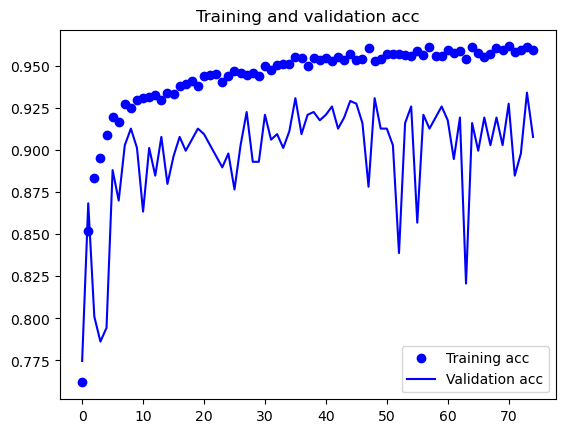

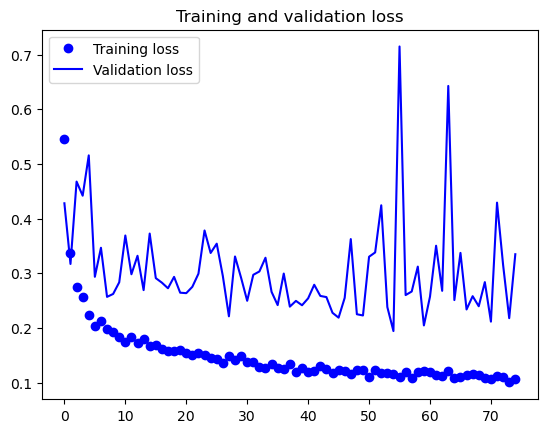

In [22]:
#validación del modelo
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
print('Avg. Train Accuracy: ',round(np.mean(acc),3)*100)
print('Avg. Test Accuracy:  ',round(np.mean(val_acc),4)*100)
print('Avg. Train Loss: ',round(np.mean(loss),3)*100)
print('Avg. Test Loss:  ',round(np.mean(val_loss),4)*100)
epochs = range(len(acc))

plt.figure()

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation acc')
plt.legend()
plt.show()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [23]:
classifier.save('test_1.h5')

In [24]:
######### Predicción
image_val=[1427,1430,1431,1436,1437,1438,1440,1442]
import numpy as np
import matplotlib.pyplot as plt 
from keras.utils import load_img, img_to_array
import numpy as np
path="Data/val/NORMAL"
for i in image_val:
  img_path=path+"/NORMAL2-IM-"+str(i)+"-0001.jpeg"
  test_image = load_img(img_path, target_size = (64, 64, 3))
  test_image = img_to_array(test_image)
  print(test_image.shape)
  test_image1 = np.expand_dims(test_image, axis = 0)
  print(test_image1.shape)
  result = classifier.predict(test_image1)
  print(result)
  training_dataset.class_indices
  if result[0] > np.mean(val_acc):
        prediction = 'Normal'
  else:
        prediction = 'Neumonia'

  print('La foto es de un:' ,prediction)

(64, 64, 3)
(1, 64, 64, 3)
1/1 [==============================] - 1s 798ms/step
[[1.]]
La foto es de un: Normal
(64, 64, 3)
(1, 64, 64, 3)
1/1 [==============================] - 0s 21ms/step
[[1.]]
La foto es de un: Normal
(64, 64, 3)
(1, 64, 64, 3)
1/1 [==============================] - 0s 23ms/step
[[1.]]
La foto es de un: Normal
(64, 64, 3)
(1, 64, 64, 3)
1/1 [==============================] - 0s 29ms/step
[[1.]]
La foto es de un: Normal
(64, 64, 3)
(1, 64, 64, 3)
1/1 [==============================] - 0s 22ms/step
[[1.]]
La foto es de un: Normal
(64, 64, 3)
(1, 64, 64, 3)
1/1 [==============================] - 0s 24ms/step
[[1.]]
La foto es de un: Normal
(64, 64, 3)
(1, 64, 64, 3)
1/1 [==============================] - 0s 25ms/step
[[0.]]
La foto es de un: Neumonia
(64, 64, 3)
(1, 64, 64, 3)
1/1 [==============================] - 0s 24ms/step
[[0.]]
La foto es de un: Neumonia
